In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [133]:
'''
1. Variables del dataframe:
TOWN: Ciudad o municipio
LON: Longitud
LAT: Latitud
MEDV: Valor medio de las viviendas
CRIM: Tasa de criminalidad
ZN: Proporción de zonas no residenciales
INDUS: Proporción de trabajadores industriales
CHAS: Indica si la vivienda está cerca del río (1) o no (0)
NOX: Concentración de óxidos de nitrógeno
RM: Número de habitaciones por vivienda
AGE: Edad media de las viviendas
DIS: Distancia al centro de la ciudad
RAD: Accesibilidad a las autopistas
TAX: Tasa de impuestos
PTRATIO: Ratio de alumnos por profesor
B: Proporción de población negra
LSTAT: Porcentaje de población con bajo nivel socioeconómico
'''
df = pd.read_csv('casasboston.csv')
df

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


Histograma: Un histograma es útil para ver la distribución de una
variable, es decir, nos permite ver los valores más comunes. Para
el caso que se presenta se desea ver la distribución de la
cantidad media de habitaciones en el estudio realizado.


Histograma que representa graficamente la distribucion de la cantidad media de habitaciones por vivienda. 
La linea roja representa en promedio el numero de habitaciones que posee una casa.


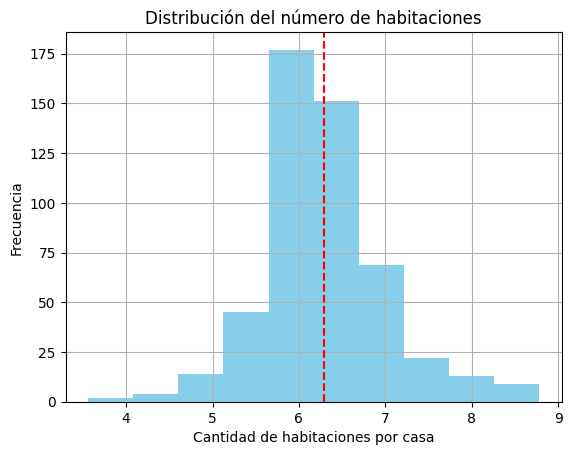

In [134]:
plt.hist(x= df['RM'], color='skyblue')
plt.xlabel('Cantidad de habitaciones por casa')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de habitaciones')
plt.grid(True)
plt.axvline(df['RM'].mean(), color='red', linestyle='dashed')
print('''Histograma que representa graficamente la distribucion de la cantidad media de habitaciones por vivienda. 
La linea roja representa en promedio el numero de habitaciones que posee una casa.''')

Dispersión: sirve para representar la relación entre dos
variables. Para nuestro caso se desea ver la relación entre índice
de crimen y el valor mediano de las casas. En otras palabras, ¿el
índice de crimen afecta el valor medio de las casas?

El indice de criminalidad afecta el valor medio de venta de una vivenda.
Los barrios con altos indices de crimen dificilmente logren superar el valor de venta de 20.000 USD 


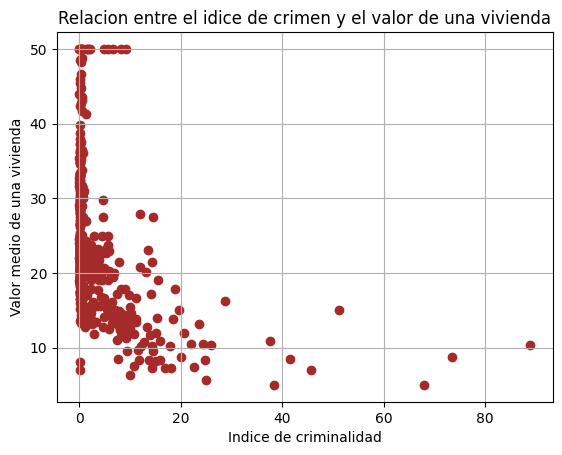

In [135]:
plt.scatter(x=df['CRIM'],y=df['MEDV'], color='brown' )
plt.xlabel('Indice de criminalidad')
plt.ylabel('Valor medio de una vivienda')
plt.title('Relacion entre el idice de crimen y el valor de una vivienda')
plt.grid(True)
print('El indice de criminalidad afecta el valor medio de venta de una vivenda.\nLos barrios con altos indices de crimen dificilmente logren superar el valor de venta de 20.000 USD ')

**Barras:** 

Un gráfico de barras es útil para comparar una variable entre distintos grupos o categorías. Por ejemplo, si quisiéramos observar el valor medio de cada ciudad. 

Para nuestro caso se desea agrupar por ciudad y toma la media del valor mediano.

Gráfica las 10 primeras ciudades.

Text(0.5, 1.0, 'Precio medio de las ciudades más caras')

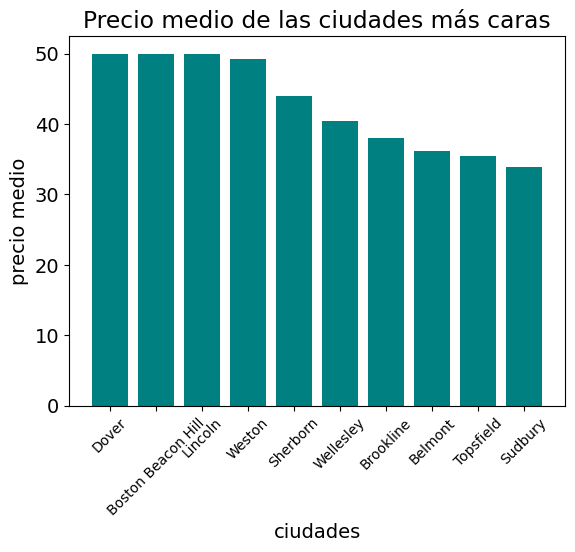

In [245]:
valor_medio = df.groupby(['TOWN'])['MEDV'].mean()

town = (valor_medio.sort_values(ascending=False)).head(10)

plt.bar(x=town.index, height=town,color='teal')
plt.tick_params(axis='x', rotation=45, labelsize=10)
plt.xlabel('ciudades')
plt.ylabel('precio medio')
plt.title('Precio medio de las ciudades más caras')



In [217]:
town.index

Index(['Dover', 'Boston Beacon Hill', 'Lincoln', 'Weston', 'Sherborn',
       'Wellesley', 'Brookline', 'Belmont', 'Topsfield', 'Sudbury'],
      dtype='object', name='TOWN')

Cajas: Los diagramas de cajas son útiles para representar grupos de datos y compararlos entre ellos. Otro uso importante es que nos permiten identificar de forma sencilla si una variable tiene muchos outliers (valores atípicos) esto es, elementos que se alejan de los valores frecuentes de dicha variable. 

Para nuestro caso, se desea ver los valores atípicos de índice de crimen en los
diferentes cuantiles de valor mediano.

Text(0.5, 1.0, 'Boxplot para el indice de criminalidad')

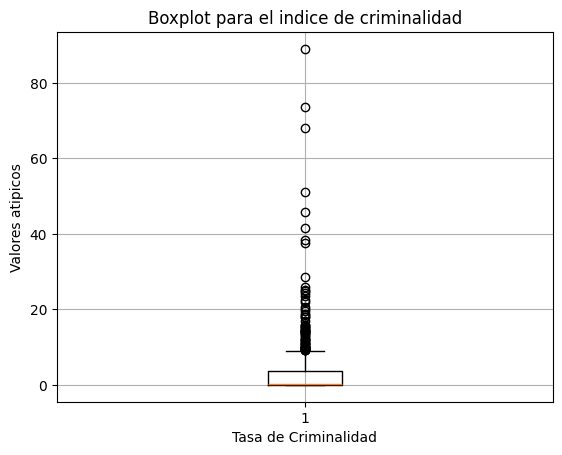

In [147]:

plt.boxplot(df['CRIM'])
plt.xlabel('Tasa de Criminalidad')
plt.ylabel('Valores atipicos')
plt.grid(True)
plt.title('Boxplot para el indice de criminalidad')